In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox

import matplotlib
import matplotlib.animation as animation


In [5]:
%matplotlib widget

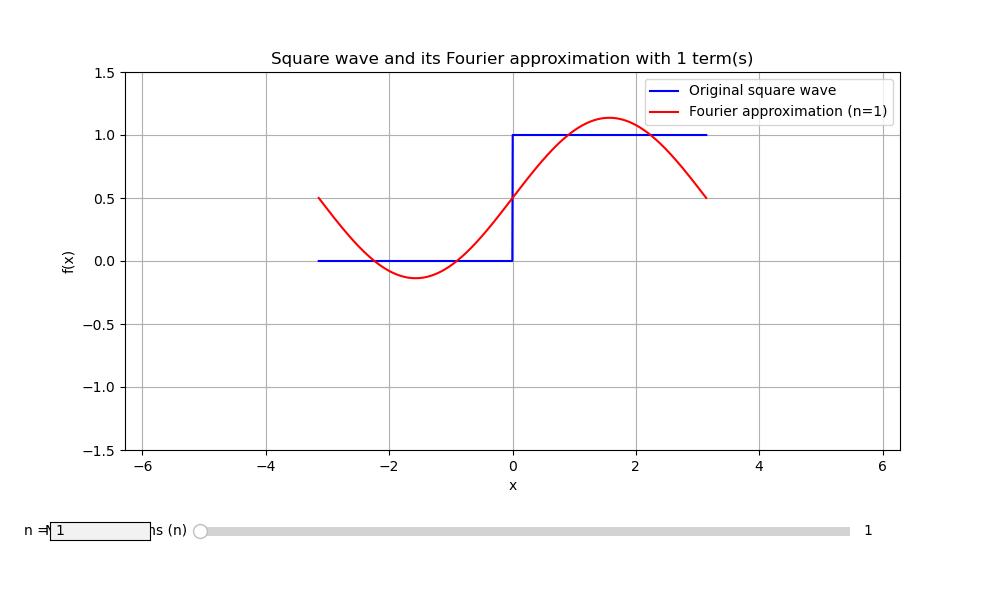

In [6]:
# Create the x domain
x_a = np.linspace(-1*np.pi, np.pi, 1000)

# Original square wave function
def create_square_wave(x):
    x1 = np.sign(np.sin(x))
    x1[:len(x)//2] = 0
    return x1

# Corrected Fourier series function
def fourier_series_sqr(x, n):
    f = 0.5
    for k in range(n):
        f += (2 / ((2*k + 1)* np.pi)) * np.sin((2*k + 1) * x)
    return f

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)

# Original function
original = create_square_wave(x_a)
original_line, = ax.plot(x_a, original, 'b-', label='Original square wave')

# Initial Fourier approximation
initial_n = 1
fourier_line, = ax.plot(x_a, fourier_series_sqr(x_a, initial_n), 'r-', 
                         label=f'Fourier approximation (n={initial_n})')

# Set up the plot
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title(f'Square wave and its Fourier approximation with {initial_n} term(s)')
ax.grid(True)
ax.legend(loc='upper right')

# Function to update the plot
def update_plot(n):
    n = int(n)
    # Update the Fourier approximation line
    fourier_line.set_ydata(fourier_series_sqr(x_a, n))
    # Update the label and title
    fourier_line.set_label(f'Fourier approximation (n={n})')
    ax.set_title(f'Square wave and its Fourier approximation with {n} term(s)')
    ax.legend(loc='upper right')
    fig.canvas.draw_idle()

# Create slider for n
ax_n = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_n = Slider(ax_n, 'Number of terms (n)', 1, 50, valinit=initial_n, valstep=1)

# Update function for slider
slider_n.on_changed(update_plot)

# Create text box for n
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'n =', initial=f'{initial_n}')

# Update function for text box
def submit_n(text):
    try:
        new_n = int(text)
        new_n = max(1, min(new_n, 50))  # Limit between 1 and 50
        slider_n.set_val(new_n)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_n)

plt.show()

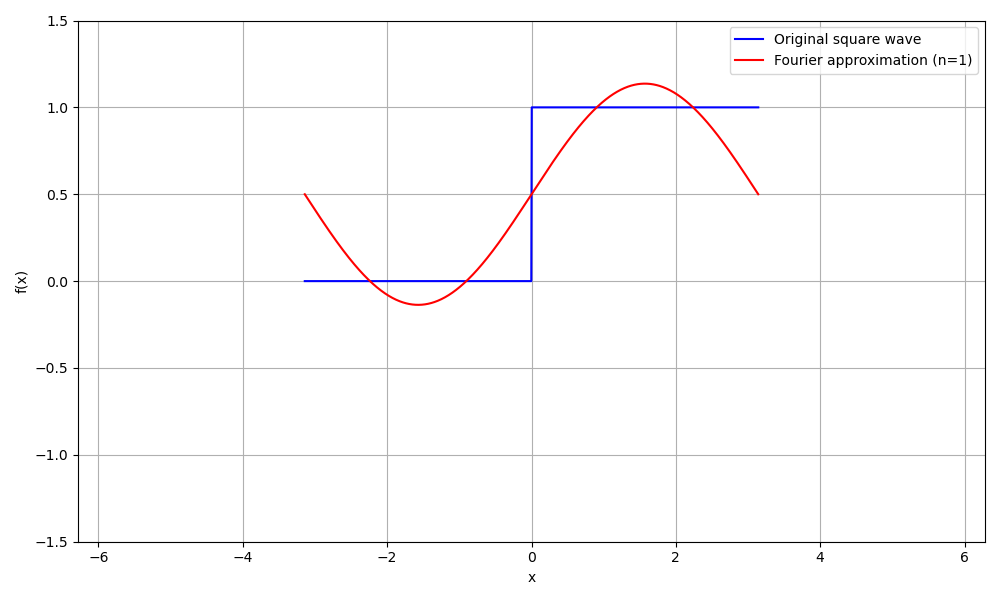

In [17]:
# Create the x domain
x_a = np.linspace(-1*np.pi, np.pi, 1000)

# Original square wave function
def create_square_wave(x):
    x1 = np.sign(np.sin(x))
    x1[:len(x)//2] = 0
    return x1

# Corrected Fourier series function
def fourier_series_sqr(x, n):
    f = 0.5
    for k in range(n):
        f += (2 / ((2*k + 1)* np.pi)) * np.sin((2*k + 1) * x)
    return f

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Original function
original = create_square_wave(x_a)
original_line, = ax.plot(x_a, original, 'b-', label='Original square wave')

# Initial Fourier approximation
initial_n = 1
fourier_line, = ax.plot(x_a, fourier_series_sqr(x_a, initial_n), 'r-', 
                       label=f'Fourier approximation (n={initial_n})')

# Set up the plot
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
ax.legend(loc='upper right')

# Define max number of terms for animation
max_terms = 30

# Animation function
def animate(frame):
    print(f'animating frame {frame}')
    n = frame + 1  # Start from n=1
    
    # Update the Fourier approximation line
    fourier_data = fourier_series_sqr(x_a, n)
    fourier_line.set_ydata(fourier_data)
    
    # Update the title and label
    ax.set_title(f'Square wave and its Fourier approximation with {n} term(s)')
    fourier_line.set_label(f'Fourier approximation (n={n})')
    
    # Update legend
    ax.legend(loc='upper right')
    
    return fourier_line,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=max_terms, blit=False, interval=3000, repeat=False)

plt.tight_layout()
plt.show()